In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pennylane as qml

## Load data

In [28]:
loc = "../local_data/log2"
types = 'cnot'

In [29]:
energies_ng = np.load(loc + '/energies_' + types + '_2.npy')
convergences_ng = np.load(loc + '/convergences_' + types + '_2.npy')
grads_ng = np.load(loc + '/grad_norms_' + types + '_2.npy')
grad_variances_ng = np.load(loc + '/grad_variances_' + types + '_2.npy')

## Plots


In [30]:
mean_loss_ng = np.mean(energies_ng, axis=1)

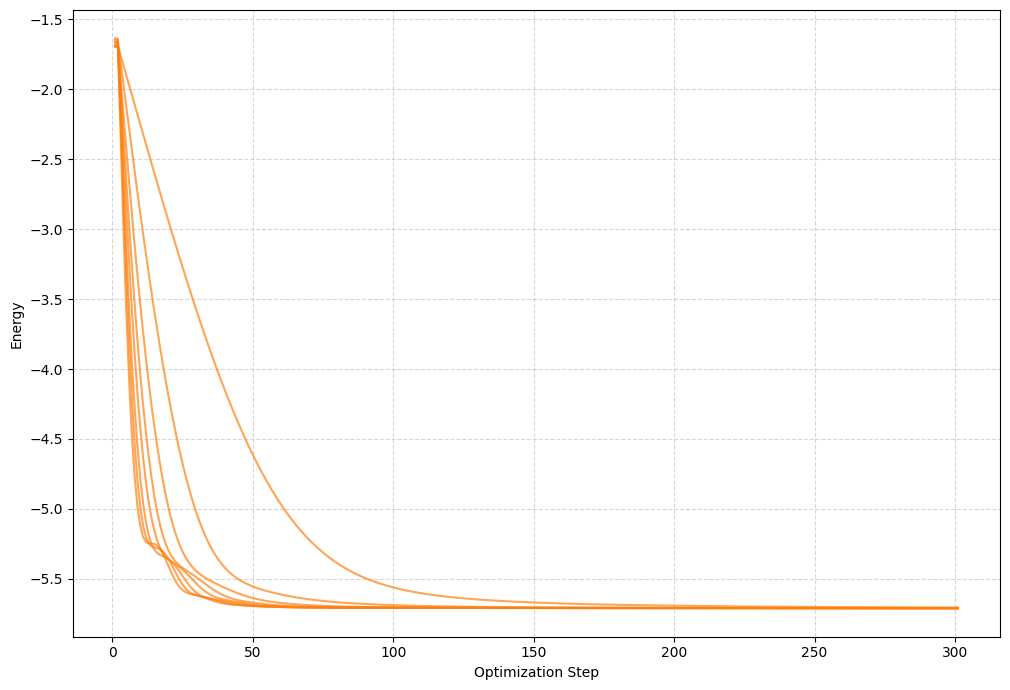

In [31]:
# --- Plotting Code ---
plt.figure(figsize=(12, 7)) # Increased figure width to accommodate the legend

steps = np.arange(1, mean_loss_ng.shape[1] + 1)

# Loop to plot and label each 'QResNet' line
for i, variance_curve in enumerate(mean_loss_ng):
    plt.plot(steps, variance_curve, linestyle='-', color='C1', alpha=0.7, 
             label=f'QResNet w/ L={2*(i+1)}')

plt.xlabel('Optimization Step')
plt.ylabel('Energy')
plt.grid(True, which="both", ls="--", alpha=0.5)

# --- Legend Management ---
# Place the legend outside the plot area to the right to avoid clutter
#plt.legend(title='Individual Runs', bbox_to_anchor=(1.02, 1), loc='upper left')

# Adjust plot layout to make room for the external legend
plt.tight_layout(rect=[0, 0, 0.85, 1]) 

plt.show()

In [32]:
dataset = qml.data.load('qchem', molname="He2")[0]
exact_energy = dataset.fci_energy
layers = np.arange(2, 17, 2)

In [33]:
min_ng = np.min(energies_ng, axis=1)[:,-1]

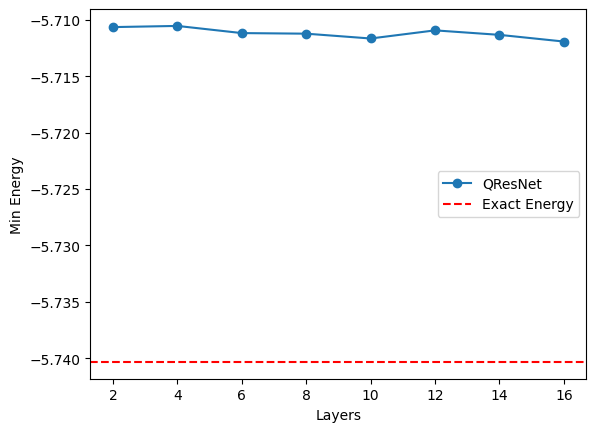

In [34]:
plt.plot(layers, min_ng, marker='o', label='QResNet')
plt.axhline(exact_energy, color='r', linestyle='--', label='Exact Energy')
plt.xlabel('Layers')
plt.ylabel('Min Energy')
plt.legend()
plt.show()

In [35]:
median_ng = np.median(energies_ng, axis=1)[:,-1]

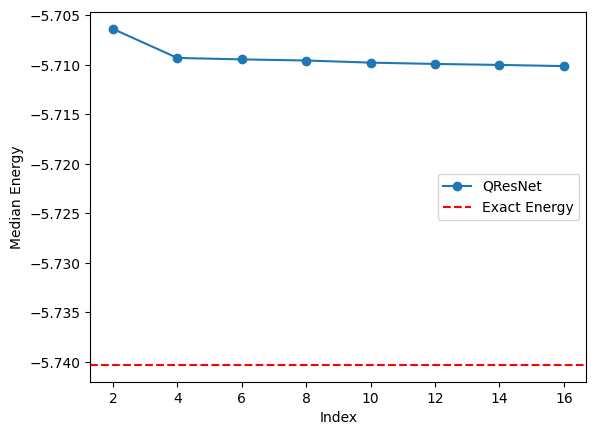

In [36]:
plt.plot(layers, median_ng, marker='o', label='QResNet')
plt.axhline(exact_energy, color='r', linestyle='--', label='Exact Energy')
plt.xlabel('Index')
plt.ylabel('Median Energy')
plt.legend()
plt.show()